What's the Weather Like by Greg Roschel
-----------------------------------------------------------

In [10]:
# Dependencies and Setup

# Include this cell for interactive plots
%matplotlib inline # This keeps the "Stop interaction" popup bar from occuring with each scatter plot  

# Other Dependencies
import os  
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json  
from pprint import pprint  
import datetime

# Import the Open Weather API key
from api_keys import ow_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities_weather_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# Generate a list of cities by name from Citipy from a randomly generated list of latitudes & longitudes

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # citipy.nearest_city(lat_lng[0] is the latitude of the city
    # citipy.nearest_city(lat_lng[1] is the longitude of the city
    
    # If the city is unique (not already in our collection of cities list), then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"The city count is: {len(cities)}")
print()
if len(cities) < 500:
    print(f"We've acquired less than 500 cities. That does not meet our minimum requirements")
else:
    print(f"We've acquired at least 500 cities; we're good to go!")

The city count is: 594

We've acquired at least 500 cities; we're good to go!


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# Access the Open Weather API to get the weather for each of our randomly generated cities

# Set up some initial variables used to access the Open Weather API
ow_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build the query URL
query_url = f"{ow_url}appid={ow_api_key}&units={units}&q="  

# Get weather data - for testing purposes only
# weather_response = requests.get(query_url)
# weather_json = weather_response.json()  
# weather_json

# set up lists to hold open weather API reponse info
city_out = []
clouds = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Initialize Variables
city_count = 0
city_found_count = 0
city_not_found_count = 0

print("Beginning Weather Data Retrieval:")
print("---------------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
    city_count += 1
    try:
        response = requests.get(query_url + city).json()
        city_out.append(response['name'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        city_found_count += 1
        print(f"Processing city #{city_count} - City Name: {response['name']}")
    except KeyError:
        city_not_found_count += 1
        print(f"Processing city #{city_count} - City Name: {city} - not found in Open Weather API Database. Skipping...") 

print("Weather Data Retrieval Complete")
print("-------------------------------")
print()
print(f"Number of cities processed is: {len(cities)}")
print(f"Number of cities found in Open Weather API Database is: {city_found_count}")
print(f"Number of cities not found in Open Weather API Database is: {city_not_found_count}")              

Beginning Weather Data Retrieval:
---------------------------------
Processing city #1 - City Name: Castro
Processing city #2 - City Name: Hermanus
Processing city #3 - City Name: Busselton
Processing city #4 - City Name: Denia
Processing city #5 - City Name: Hilo
Processing city #6 - City Name: San Quintin
Processing city #7 - City Name: Puerto Ayora
Processing city #8 - City Name: Swan River
Processing city #9 - City Name: Kapaa
Processing city #10 - City Name: Ushuaia
Processing city #11 - City Name: Dikson
Processing city #12 - City Name: Zaria
Processing city #13 - City Name: Mehamn
Processing city #14 - City Name: Rikitea
Processing city #15 - City Name: Mataura
Processing city #16 - City Name: Ancud
Processing city #17 - City Name: illoqqortoormiut - not found in Open Weather API Database. Skipping...
Processing city #18 - City Name: Tiksi
Processing city #19 - City Name: palabuhanratu - not found in Open Weather API Database. Skipping...
Processing city #20 - City Name: Dingle


Processing city #167 - City Name: grand river south east - not found in Open Weather API Database. Skipping...
Processing city #168 - City Name: Doha
Processing city #169 - City Name: Kruisfontein
Processing city #170 - City Name: Amravati
Processing city #171 - City Name: Banska Stiavnica
Processing city #172 - City Name: Rocha
Processing city #173 - City Name: Thinadhoo
Processing city #174 - City Name: Hailey
Processing city #175 - City Name: barentsburg - not found in Open Weather API Database. Skipping...
Processing city #176 - City Name: Kanchanaburi
Processing city #177 - City Name: Batticaloa
Processing city #178 - City Name: Cape Town
Processing city #179 - City Name: Zhoucheng
Processing city #180 - City Name: Kununurra
Processing city #181 - City Name: Kamenka
Processing city #182 - City Name: Bambous Virieux
Processing city #183 - City Name: Maniitsoq
Processing city #184 - City Name: Saint-Augustin
Processing city #185 - City Name: Hasaki
Processing city #186 - City Name: 

Processing city #327 - City Name: Sao Filipe
Processing city #328 - City Name: Alekseyevka
Processing city #329 - City Name: Haines Junction
Processing city #330 - City Name: ngukurr - not found in Open Weather API Database. Skipping...
Processing city #331 - City Name: Khandbari
Processing city #332 - City Name: kuah - not found in Open Weather API Database. Skipping...
Processing city #333 - City Name: Ikom
Processing city #334 - City Name: Afzalgarh
Processing city #335 - City Name: Marsaxlokk
Processing city #336 - City Name: sorvag - not found in Open Weather API Database. Skipping...
Processing city #337 - City Name: Haradok
Processing city #338 - City Name: Belmonte
Processing city #339 - City Name: At-Bashi
Processing city #340 - City Name: Avera
Processing city #341 - City Name: Saint-Francois
Processing city #342 - City Name: Port Hardy
Processing city #343 - City Name: Cheyenne
Processing city #344 - City Name: Kiunga
Processing city #345 - City Name: Simbahan
Processing cit

Processing city #491 - City Name: Bracebridge
Processing city #492 - City Name: Norilsk
Processing city #493 - City Name: Aiquile
Processing city #494 - City Name: Panalingaan
Processing city #495 - City Name: Van
Processing city #496 - City Name: Sioux Lookout
Processing city #497 - City Name: Tateyama
Processing city #498 - City Name: Turukhansk
Processing city #499 - City Name: Kantemirovka
Processing city #500 - City Name: Wonthaggi
Processing city #501 - City Name: longlac - not found in Open Weather API Database. Skipping...
Processing city #502 - City Name: bousso - not found in Open Weather API Database. Skipping...
Processing city #503 - City Name: Dryden
Processing city #504 - City Name: Padampur
Processing city #505 - City Name: Kosa
Processing city #506 - City Name: Mogadishu
Processing city #507 - City Name: Atar
Processing city #508 - City Name: zachagansk - not found in Open Weather API Database. Skipping...
Processing city #509 - City Name: arkhangelos - not found in Op

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Verify the length of the lists where out weather data is stored
print()
print("Verifying list lengths:")
print("-----------------------")
print(f"city_out list length = {len(city_out)}")
print(f"clouds list length = {len(clouds)}")
print(f"country list length = {len(country)}")
print(f"date list length = {len(date)}")
print(f"humidity list length = {len(humidity)}")
print(f"lat list length = {len(lat)}")
print(f"lng list length = {len(lng)}")
print(f"max_temp list length = {len(max_temp)}")
print(f"wind_speed list length = {len(wind_speed)}")
print()

# Create a DataFrame
weather_dict = {
    "City": city_out,
    "Cloudiness": clouds,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed    
}
weather_data = pd.DataFrame(weather_dict)
print(f"There are {len(weather_data)} records in our Weather Data Data Frame")
weather_data.head(10)


Verifying list lengths:
-----------------------
city_out list length = 519
clouds list length = 519
country list length = 519
date list length = 519
humidity list length = 519
lat list length = 519
lng list length = 519
max_temp list length = 519
wind_speed list length = 519

There are 519 records in our Weather Data Data Frame


,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Castro,90,CL,1545494400,71,-42.48,-73.76,57.20,2.24
1,Hermanus,8,ZA,1545497648,67,-34.42,19.24,69.42,2.93
2,Busselton,0,AU,1545497648,100,-33.64,115.35,67.39,12.66
3,Denia,0,ES,1545497648,100,38.84,0.11,58.30,2.93
4,Hilo,1,US,1545493980,83,19.71,-155.08,66.02,8.05
5,San Quintin,48,PH,1545497648,83,17.54,120.52,70.68,2.48
6,Puerto Ayora,75,EC,1545494400,74,-0.74,-90.35,80.60,17.22
7,Swan River,76,CA,1545497649,87,52.11,-101.27,21.13,4.27
8,Kapaa,90,US,1545494160,87,22.08,-159.32,73.04,14.99
9,Ushuaia,75,AR,1545494400,39,-54.81,-68.31,62.60,19.46


In [5]:
# Wrtite the data frame out to a csv file
weather_data.to_csv(output_data_file, index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

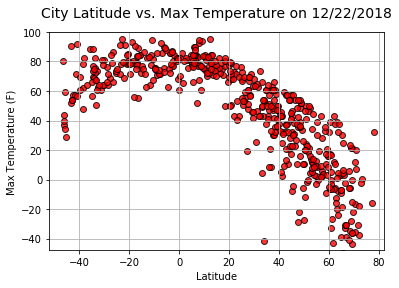

In [11]:
# Create a title, x label, and y label for our chart
now = datetime.datetime.now()
today = f"{now.month}/{now.day}/{now.year}"
plt.title("City Latitude vs. Max Temperature on " + today, pad=15, fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Set x & y coordinate limits
plt.xlim(min(weather_data['Latitude']*0.95), max(weather_data['Latitude']*1.05))  
plt.ylim(min(weather_data['Max Temp']*0.95), max(weather_data['Max Temp']*1.05))  

# Plot it
plt.scatter(x=weather_data["Latitude"], y=weather_data["Max Temp"], marker="o", facecolors="red", edgecolors="black", alpha=0.8) 

# Save an image of the chart and print to screen
plt.savefig("latitude_temperature_plot.png")

# Print the scatter plot to the screen
plt.show()  

#### Latitude vs. Humidity Plot

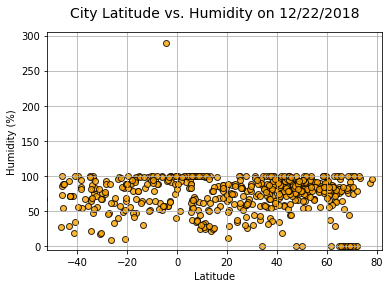

In [12]:
# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Humidity on " + today, pad=15, fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")  
plt.grid()

# Set x & y coordinate limits
plt.xlim(min(weather_data['Latitude']*0.95), max(weather_data['Latitude']*1.05))  
plt.ylim(-5, max(weather_data['Humidity']*1.05))  

# Plot it
plt.scatter(x=weather_data["Latitude"], y=weather_data["Humidity"], marker="o", facecolors="orange", edgecolors="black", alpha=0.8) 

# Save an image of the chart and print to screen
plt.savefig("latitude_humidity_plot.png")

# Print the scatter plot to the screen
plt.show()  

#### Latitude vs. Cloudiness Plot

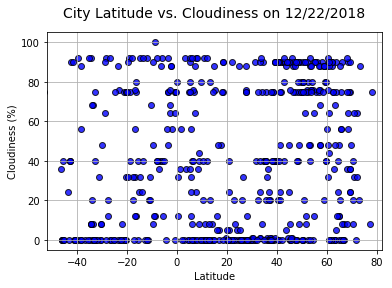

In [13]:
# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Cloudiness on " + today, pad=15, fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")  

# Set x & y coordinate limits
plt.xlim(min(weather_data['Latitude']*0.95), max(weather_data['Latitude']*1.05))  
plt.ylim(-5, max(weather_data['Cloudiness']*1.05))  
plt.grid()

# Plot it
plt.scatter(x=weather_data["Latitude"], y=weather_data["Cloudiness"], marker="o", facecolors="blue", edgecolors="black", alpha=0.8) 

# Save an image of the chart and print to screen
plt.savefig("latitude_cloudiness_plot.png")

# Print the scatter plot to the screen
plt.show()  

#### Latitude vs. Wind Speed Plot

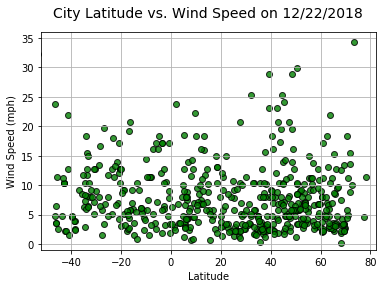

In [14]:
# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Wind Speed on " + today, pad=15, fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")  

# Set x & y coordinate limits
plt.xlim(min(weather_data['Latitude']*0.95), max(weather_data['Latitude']*1.05))  
plt.ylim(-1, max(weather_data['Wind Speed']*1.05))  
plt.grid()

# Plot it
plt.scatter(x=weather_data["Latitude"], y=weather_data["Wind Speed"], marker="o", facecolors="green", edgecolors="black", alpha=0.8) 

# Save an image of the chart and print to screen
plt.savefig("latitude_windspeed_plot.png")

# Print the scatter plot to the screen
plt.show()  

Three observable trends based on the data:
-------------------------------------------------------------

1. Temperatures north of the equator at this time of year (12/22/2018) range from -38 degrees F (fahrenheit) to 95 degrees F while temperatures south of the equator range from 40 degrees F to 108 degrees F. Therefore, I'd rather be south of the equator this time of year.

2. Humidity & cloudiness appear to be equally distributed north or south of the equator at this time of year. There is no significant difference between humidity readings or cloudiness north or south of the equator. However, without proper statictical analysis I cannot state this unequivocally.

3. Wind speeds appear to be equally distributed north or south of the equator at this time of year. There is no significant difference between wind speeds north or south of the equator. However, without proper statictical analysis I cannot state this unequivocally.